<a href="https://colab.research.google.com/github/Nikkiie/Eda---Global-terrorism/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
#Importing some required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = ('/content/drive/MyDrive/Colab Notebooks/Global Terrorism Data.csv')
terrorism_df = pd.read_csv(file_path, encoding = 'ISO-8859-1')

In [4]:
terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
terrorism_df.shape

(181691, 135)

In [7]:
terrorism_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
for i in terrorism_df.columns:
  print(i, end = ', ')

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

## Cleaning the data

In [9]:
terrorism_df = terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                                            'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                                            'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [10]:
terrorism_df = terrorism_df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]

In [11]:
terrorism_df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
State               421
City                434
Attack_type           0
Target_type           0
Target_subtype    10373
Gang_name             0
Weapon_type           0
dtype: int64

In [12]:
#Filling the nan values in state column as unknown
terrorism_df['State']=terrorism_df['State'].fillna('Unknown')

In [13]:
#Filling the nan values in city column as unknown
terrorism_df['City']=terrorism_df['City'].fillna('Unknown')

In [14]:
#Filling the nan values in Target_subtype column as others
terrorism_df['Target_subtype']=terrorism_df['Target_subtype'].fillna('Others')

In [15]:
terrorism_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
dtype: int64

In [16]:
terrorism_df.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type'],
      dtype='object')

In [17]:
terrorism_df.columns.nunique()

12

In [18]:
total_countries = terrorism_df['Country'].nunique()
total_countries

205

In [19]:
print(terrorism_df['Region'].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']


In [20]:
print(terrorism_df['Region'].nunique())

12


In [21]:
print(terrorism_df['Attack_type'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [22]:
print(terrorism_df['Attack_type'].nunique())

9


In [23]:
print(terrorism_df['Target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [24]:
print(terrorism_df['Target_type'].nunique())

22


In [25]:
print(terrorism_df['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Fake Weapons' 'Radiological' 'Other' 'Biological']


In [26]:
print(terrorism_df['Weapon_type'].nunique())

12


In [27]:
print(terrorism_df['Gang_name'].unique())

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']


In [28]:
print(terrorism_df['Gang_name'].nunique())

3537


In [29]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Year            181691 non-null  int64 
 1   Month           181691 non-null  int64 
 2   Day             181691 non-null  int64 
 3   Country         181691 non-null  object
 4   Region          181691 non-null  object
 5   State           181691 non-null  object
 6   City            181691 non-null  object
 7   Attack_type     181691 non-null  object
 8   Target_type     181691 non-null  object
 9   Target_subtype  181691 non-null  object
 10  Gang_name       181691 non-null  object
 11  Weapon_type     181691 non-null  object
dtypes: int64(3), object(9)
memory usage: 16.6+ MB


In [31]:
terrorism_df.describe()

,Year,Month,Day
count,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644
std,13.259430,3.388303,8.814045
min,1970.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000
50%,2009.000000,6.000000,15.000000
75%,2014.000000,9.000000,23.000000
max,2017.000000,12.000000,31.000000


In [32]:
terrorism_df['Region'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

These were the top 10 affected regions.

In [33]:
terrorism_df['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

These were the top 10 affected countries.

In [34]:
terrorism_df['State'].value_counts().head(10)

Baghdad               7645
Unknown               4711
Northern Ireland      4498
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

These were the top 10 affected States.

In [35]:
terrorism_df['City'].value_counts().head(10)

Unknown         10209
Baghdad          7589
Karachi          2652
Lima             2359
Mosul            2265
Belfast          2171
Santiago         1621
Mogadishu        1581
San Salvador     1558
Istanbul         1048
Name: City, dtype: int64

These were the top 10 affected cities.

In [36]:
terrorism_df['Attack_type'].value_counts().head(10)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64

These were the top 10 attacking modes.

In [37]:
terrorism_df['Target_type'].value_counts().head(10)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: Target_type, dtype: int64

These were the top 10 targets to attack.

In [38]:
terrorism_df['Target_subtype'].value_counts().head(10)

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
Others                                                     10373
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Village/City/Town/Suburb                                    6542
Politician or Political Party Movement/Meeting/Rally        6306
Police Building (headquarters, station, school)             5907
Military Barracks/Base/Headquarters/Checkpost               5211
Name: Target_subtype, dtype: int64

In [39]:
terrorism_df['Weapon_type'].value_counts().head(6)

Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Chemical        321
Name: Weapon_type, dtype: int64

These were the top chosen Weapon types.



In [40]:
terrorism_df['Gang_name'].value_counts().head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Gang_name, dtype: int64

These were the top 10 leading gangs.

## Visualization

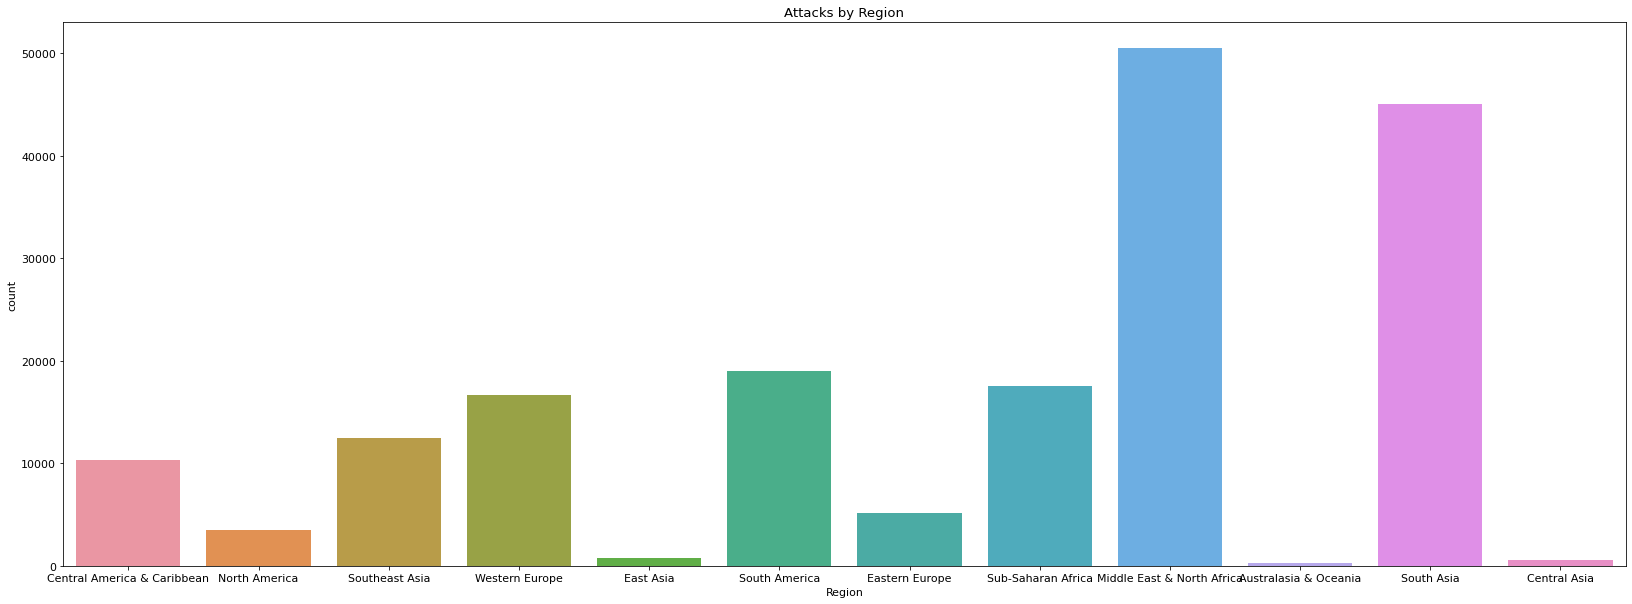

In [41]:
plt.figure(figsize=(28,10));
plt.rcParams.update({'font.size':11});
plt.xticks(rotation = 0)
plt.title('Attacks by Region')
sns.countplot(x=terrorism_df.Region);
plt.style.use("dark_background")


Text(0.5, 1.0, 'Based on Attack type')

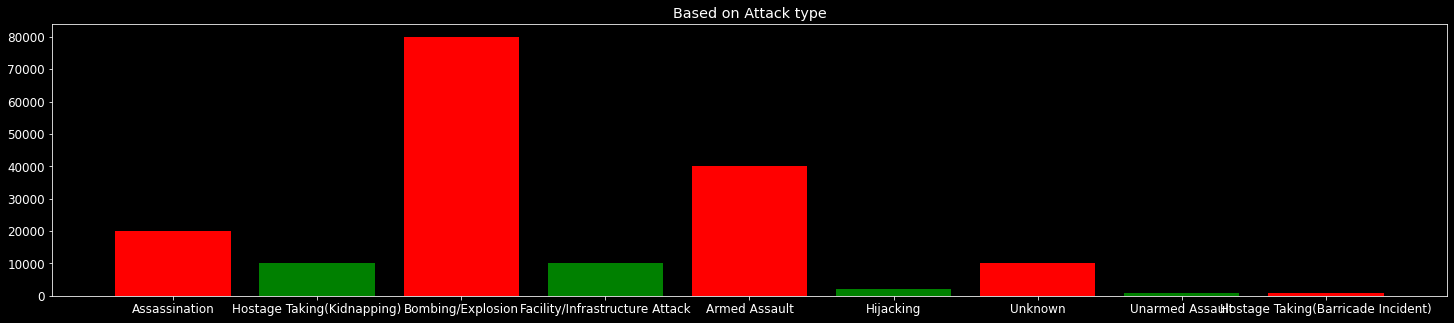

In [42]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12});
x= ['Assassination', 'Hostage Taking(Kidnapping)', 'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault', 'Hostage Taking(Barricade Incident)']
h = [20000, 10000, 80000, 10000, 40000, 2000, 10000, 1000, 1000]
c = ['Red', 'Green', 'Red', 'Green','Red', 'Green', 'Red', 'Green', 'Red']
plt.bar(x, height = h, color = c)
plt.xticks(rotation = 0)
plt.title('Based on Attack type')